In [1]:
import keras as keras
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D

from readData import readData

from plotDigits import predictAndPlot, plotDigit

2024-05-12 21:55:01.370228: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# initialisierung des Modells
model = Sequential()
model.add(Dense(600, activation='relu', input_shape=(784, ),name = "first_layer"))
model.add(Dense(400, activation='relu',  name = "hidden_layer_1"))
model.add(Dense(100, activation='relu',  name = "hidden_layer_2"))
model.add(Dense(10, activation = 'softmax', name = "output_layer"))

/Users/moritzschroer/miniconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# kompilieren des Modells
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
# Einlesen der Trainingsdaten und Testdaten
train_length = 59000
test_length = 500
train_data, training_verification_data, test_data, test_verificarion_data = readData(train_length, test_length)

Lese 59000 Trainingsdaten ein:


Lese 500 Testdaten ein


In [5]:
# Trainieren des Modells
model.fit(train_data, training_verification_data, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8553 - loss: 0.4680 - val_accuracy: 0.9629 - val_loss: 0.1245
Epoch 2/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9716 - loss: 0.0923 - val_accuracy: 0.9675 - val_loss: 0.1062
Epoch 3/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9828 - loss: 0.0564 - val_accuracy: 0.9747 - val_loss: 0.0893
Epoch 4/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9877 - loss: 0.0367 - val_accuracy: 0.9726 - val_loss: 0.1041
Epoch 5/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9903 - loss: 0.0298 - val_accuracy: 0.9750 - val_loss: 0.0973
Epoch 6/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9923 - loss: 0.0238 - val_accuracy: 0.9693 - val_loss: 0.1314
Epoch 7/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9924 - loss: 0.0233 - val_accuracy: 0.9771 - val_loss: 0.0904
Epoch 8/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9945 - loss: 0.0156 - val_accu

In [6]:
# Testen des Modells
test_loss, test_acc = model.evaluate(test_data, test_verificarion_data)
print('Test accuracy:', test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9737 - loss: 0.0891
Test accuracy: 0.9760000109672546


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


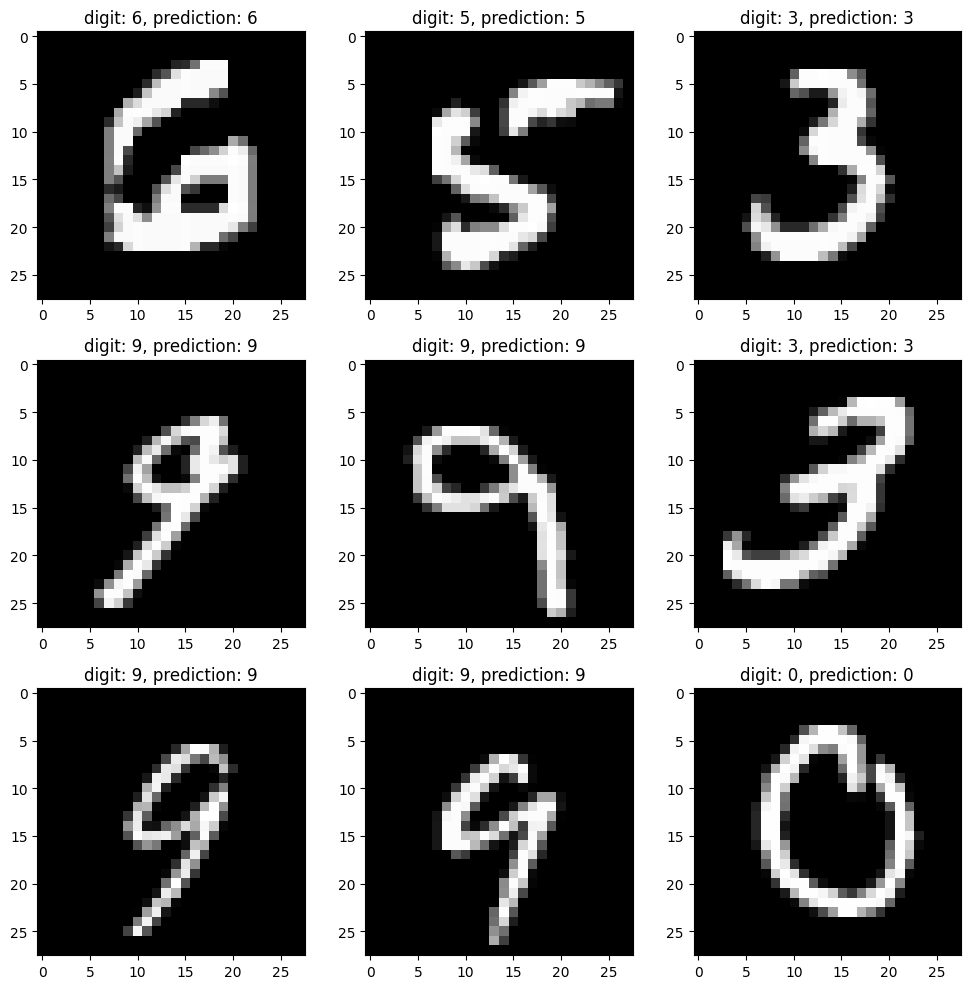

In [7]:
# Plotten einiger vom Modell vorhergesagten Ziffern 
predictAndPlot(model, test_data, test_verificarion_data)